In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display
dtype = np.float64
from printmd import  *
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

**Задача 1.** Смоделировать конечную совокупность объема $N = 5000$ из нормальной совокупности с параметрами $M\xi = 3m + 10$, $D\xi = m$.

In [3]:
m = 15
N = 5000
Y = 3*m + 10 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N)

Простым случайным выбором извлечь из конечной совокупности выборку объема $\frac{m}{10*m-4} \cdot 100$ процентов от N. 

In [4]:
n = np.int16( np.ceil( (m/(10*m -4)) * N ) )
Y_sample = np.random.choice(Y , size=n)

А. Определить среднее $\overline{Y}$ и дисперсию $\sigma^2$ конечной совокупности.

In [5]:
Y_m = np.mean(Y)
Y_d = np.sum((Y - Y_m) ** 2) / (N - 1)
display(mdLabelNumber("\\overline{Y}= \\frac{1}{N}\\sum_{i=1}^{N} y_i", Y_m))
display(mdLabelNumber("\\sigma^2=\\frac{1}{N - 1}\\sum_{i=1}^{N} (y_i - \\overline{Y})^2", Y_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Б. Найти выборочное значение дисперсии оценки среднего совокупности и построить доверительный интервал уровня $\gamma = 0.95$ для среднего с учетом поправки на конечность совокупности. Проверить, накрывает ли интервал действительное значение среднего.


In [6]:
y_m = Y_sample.mean()
S = np.sum((Y_sample - y_m) ** 2) / (n - 1)
display(mdLabelNumber("\\hat{\\overline{Y}} = \\frac{1}{n} \\sum_{i=1}^{n} \\xi_i", y_m))
display(mdLabelNumber("\\hat{S}^2  =\\frac{1}{n - 1}\\sum_{i=1}^{n} (\\xi_i - \\hat{\\overline{Y}})^2", S))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
gamma = 0.95
a = 1 - gamma
D_y_m = S / n * ( 1 - n/N)
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Y}} = \\frac{\\hat{S}^2}{n} \\times \\Big( 1 - \\frac{n}{N} \\Big)", D_y_m))

<IPython.core.display.Latex object>

In [8]:
y_m_left_bound = y_m - scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_y_m, 0.5)
y_m_right_bound = y_m + scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_y_m, 0.5)
printMd("$$ \\gamma = P(\\hat{\\overline{Y}} - z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}} \\leq \\hat{{Y}} \\leq \\hat{\\overline{Y}} + z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}})$$")
printMd(f"$$ {gamma} = P({"{:.3f}".format(y_m_left_bound)} \\leq \\hat{{Y}} \\leq {"{:.3f}".format(y_m_right_bound)})$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

– действительное значение среднего попадает в интервал

**Задача 2.** Смоделировать конечную совокупность объема $N = 5000$ из нормальной совокупности с параметрами $M\xi = 2m + 10$, $D\xi = m$.

In [9]:
N = 5000
Y = 2 * m + 10 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N)

Обозначим элементы совокупности через $y_i, i=\overline{1,5000}$. Получить новую совокупность Z с элементами 
$$z_i = \left(\begin{aligned}  1, y_i \le 2m + 10 - \sqrt{m} \\ 0, \text{в противном случае} \end{aligned}\right.$$

In [10]:
Z = Y < (2 * m + 10 - np.pow(m, 0.5))

Простым случайным выбором извлечь из конечной совокупности выборку объема $\frac{m}{10*m-4} \cdot 100$ процентов от $N$. 

In [11]:
n = np.int16( np.ceil( (m/(10*m -4)) * N ) )
z = np.random.choice(Z , size=n)

А. Оценить среднее $\overline{Z}$ и дисперсию $\sigma^2$ конечной совокупности Z.

In [12]:
Z_m = np.mean(Z)
Z_d = np.sum((Z - Z_m) ** 2) / (N - 1)
display(mdLabelNumber("\\overline{Z}= \\frac{1}{N}\\Sigma z_i", Z_m))
display(mdLabelNumber("\\sigma^2=\\frac{1}{N - 1}\\sum_{i=1}^{N} (z_i - \\overline{Z})^2", Z_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Б. Найти выборочное значение дисперсии оценки среднего совокупности и построить доверительный интервал уровня $\gamma = 0.95$ для среднего с учетом поправки на конечность совокупности. Проверить, накрывает ли интервал действительное значение среднего. Пояснить смысл оцениваемого параметра $\overline{Z}$.


In [13]:
z_m = z.mean()
S = np.sum((z - z_m) ** 2) / (n - 1)
display(mdLabelNumber("\\hat{\\overline{Z}} = \\frac{1}{n} \\sum_{i=1}^{n}  \\xi_i", z_m))
display(mdLabelNumber("\\hat{S}^2  =\\frac{1}{n - 1}\\sum_{i=1}^{n} (\\xi_i - \\hat{\\overline{Z}})^2", S))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
gamma = 0.95
a = 1 - gamma
D_z_m = S / n * ( 1 - n/N)
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Z}} = \\frac{\\hat{S}^2}{n} \\times \\Big( 1 - \\frac{n}{N} \\Big)", D_z_m, pres=10))

<IPython.core.display.Latex object>

In [15]:
z_m_left_bound = z_m - scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_z_m, 0.5)
z_m_right_bound = z_m + scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_z_m, 0.5)
printMd("$$ \\gamma = P(\\hat{\\overline{Z}} - z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Z}}} \\leq \\hat{{Z}} \\leq \\hat{\\overline{Z}} + z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Z}}})$$")
printMd(f"$$ {gamma} = P({"{:.4f}".format(z_m_left_bound)} \\leq \\hat{{Z}} \\leq {"{:.4f}".format(z_m_right_bound)})$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

– действительное значение среднего попадает в интервал

**Задача 3.** Смоделировать конечную совокупность $Y$ объема $N = 10000$ из нормальной совокупности с параметрами $M\xi = 3m + 10$, $D\xi = m$.

In [16]:
N = 10000
Y = 3 * m + 10 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N)

Извлечь из конечной совокупности систематическую выборку объема  $\frac{N}{k}$, где $k = [\frac{m}{10}] + 10$ . Здесь $[x]$ - целая часть x.


In [17]:
k = np.int16(np.floor( (m/10))) + 10
y = Y[::k]
n = y.shape[0]

А. Оценить среднее $\overline{Y}$ и дисперсию $\sigma^2$ конечной совокупности.

In [18]:
Y_m = np.mean(Y)
Y_d = np.sum((Y - Y_m) ** 2) / (N - 1)
display(mdLabelNumber("\\overline{Y}= \\frac{1}{N}\\sum_{i=1}^{N} y_i", Y_m))
display(mdLabelNumber("\\sigma^2=\\frac{1}{N - 1}\\sum_{i=1}^{N} (y_i - \\overline{Y})^2", Y_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Б. Найти выборочное значение дисперсии оценки среднего совокупности и построить доверительный интервал уровня $\gamma = 0.95$ для среднего с учетом поправки на конечность совокупности. Проверить, накрывает ли интервал действительное значение среднего.


In [19]:
y_m = y.mean()
S = np.sum((y - y_m) ** 2) / (n - 1)
display(mdLabelNumber("\\hat{\\overline{Y}} = \\frac{1}{n} \\sum_{i=1}^{n} \\xi_i", y_m))
display(mdLabelNumber("\\hat{S}^2  =\\frac{1}{n - 1}\\sum_{i=1}^{n} (\\xi_i - \\hat{\\overline{Y}})^2", S))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
gamma = 0.95
a = 1 - gamma
D_y_m = S / n * ( 1 - n/N)
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Y}} = \\frac{\\hat{S}^2}{n} \\times \\Big( 1 - \\frac{n}{N} \\Big)", D_y_m))

<IPython.core.display.Latex object>

In [21]:
y_m_left_bound = y_m - scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_y_m, 0.5)
y_m_right_bound = y_m + scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_y_m, 0.5)
printMd("$$ \\gamma = P(\\hat{\\overline{Y}} - z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}} \\leq \\hat{{Y}} \\leq \\hat{\\overline{Y}} + z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}})$$")
printMd(f"$$ {gamma} = P({"{:.3f}".format(y_m_left_bound)} \\leq \\hat{{Y}} \\leq {"{:.3f}".format(y_m_right_bound)})$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

– действительное значение среднего попадает в интервал

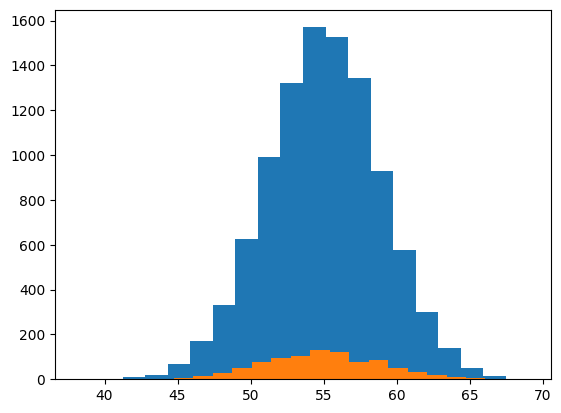

In [22]:
plt.hist(Y, bins=20)
_ = plt.hist(y, bins=20)

**Задача 4.** Смоделировать конечную совокупность объема $N = 10000$ из нормальной совокупности с параметрами $M\xi = 2m + 10$, $D\xi = m$.

In [23]:
N = 10000
Y = 2 * m + 10 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N)

Обозначим элементы совокупности через $y_i, i=\overline{1,10000}$. Получить новую совокупность Z с элементами 
$$z_i = \left(\begin{aligned}  1, y_i \le 2m + 10 - \sqrt{m} \\ 0, \text{в противном случае} \end{aligned}\right.$$

In [24]:
Z = Y < (2 * m + 10 - np.pow(m, 0.5))

Систематическим случайным выбором извлечь из конечной совокупности Z выборку объема $\frac{N}{k}$, где $k = [\frac{m}{10}] + 20$ . Здесь $[x]$ - целая часть x.


In [25]:
k = np.int16(np.floor( (m/10))) + 20
z = Z[::k]
n = y.shape[0]

А. Оценить среднее $\overline{Z}$ и дисперсию $\sigma^2$ конечной совокупности Z.

In [26]:
Z_m = np.mean(Z)
Z_d = np.sum((Z - Z_m) ** 2) / (N - 1)
display(mdLabelNumber("\\overline{Z}= \\frac{1}{N}\\sum_{i=1}^{N} z_i", Z_m))
display(mdLabelNumber("\\sigma^2=\\frac{1}{N - 1}\\sum_{i=1}^{N} (z_i - \\overline{Z})^2", Z_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Б. Найти выборочное значение дисперсии оценки среднего совокупности и построить доверительный интервал уровня $\gamma = 0.95$ для среднего с учетом поправки на конечность совокупности. Проверить, накрывает ли интервал действительное значение среднего. Пояснить смысл оцениваемого параметра $\overline{Z}$.


In [27]:
z_m = z.mean()
S = np.sum((z - z_m) ** 2) / (n - 1)
display(mdLabelNumber("\\hat{\\overline{Z}} = \\frac{1}{n} \\sum_{i=1}^{n} \\xi_i", z_m))
display(mdLabelNumber("\\hat{S}^2  =\\frac{1}{n - 1}\\sum_{i=1}^{n} (\\xi_i - \\hat{\\overline{Z}})^2", S))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [28]:
gamma = 0.95
a = 1 - gamma
D_z_m = S / n * ( 1 - n/N)
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Z}} = \\frac{\\hat{S}^2}{n} \\times \\Big( 1 - \\frac{n}{N} \\Big)", D_z_m, pres=10))

<IPython.core.display.Latex object>

In [7]:
54.98 - scipy.stats.norm.ppf( 1 - 0.025 ) * 0.0149 ** 0.5

np.float64(54.74075590617876)

In [29]:
z_m_left_bound = z_m - scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_z_m, 0.5)
z_m_right_bound = z_m + scipy.stats.norm.ppf(1 - a / 2) * np.pow(D_z_m, 0.5)
printMd("$$ \\gamma = P(\\hat{\\overline{Z}} - z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Z}}} \\leq \\hat{{Z}} \\leq \\hat{\\overline{Z}} + z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Z}}})$$")
printMd(f"$$ {gamma} = P({"{:.4f}".format(z_m_left_bound)} \\leq \\hat{{Z}} \\leq {"{:.4f}".format(z_m_right_bound)})$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

– действительное значение среднего попадает в интервал

Параметр  показывает долю (вероятность) выполнения условия: $y_i \le 2m + 10 - \sqrt{m}$

**Задача 5.** Конечная совокупность Y объема $N=10000$ состоит из трех слоев $Y_1$, $Y_2$, $Y_3$ объемами $N_1 = 3000 , N_2 = 3000,  N_3 = 4000$ соответственно. Каждый слой получен моделированием выборок из нормальных совокупностей с параметрами $M\xi = 2m + 10$, $D\xi = m$  ― первый слой, $M\xi = 2m + 5$, $D\xi = m$ ― первый слой, $M\xi = 2m + 8$, $D\xi = m + 1$ ― третий слой, 

In [30]:
N_1 = 3000
Y_1 = 2 * m + 10 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N_1)
N_2 = 3000
Y_2 = 2 * m + 5 + (np.pow(m, 0.5)) * np.random.normal(loc=0, size=N_2)
N_3 = 4000
Y_3 = 2 * m + 8 + (np.pow(m+1, 0.5)) * np.random.normal(loc=0, size=N_3)
Y = np.hstack([Y_1, Y_2, Y_3])

Из каждого слоя простым случайным выбором получены выборки объема $n_1=400, n_2=300, n_3=300$

In [31]:
n_1 = 400
n_2 = 300
n_3 = 300
y_1 = np.random.choice(Y_1 , size=n_1)
y_2 = np.random.choice(Y_2 , size=n_2)
y_3 = np.random.choice(Y_3 , size=n_3)

А. Найти точные значения среднего и дисперсии всей совокупности $Y$

In [32]:
Y_m = np.mean(Y)
Y_d = np.sum((Y - Y_m) ** 2) / (N - 1)
display(mdLabelNumber("\\overline{Y}= \\frac{1}{N}\\sum_{i=1}^{N} y_i", Y_m))
display(mdLabelNumber("\\sigma^2=\\frac{1}{N - 1}\\sum_{i=1}^{N} (y_i - \\overline{Y})^2", Y_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Б. Найти стратифицированную оценку  среднего всей совокупности и выборочное значение дисперсии этой оценки;

In [33]:
y_1_m = y_1.mean()
y_2_m = y_2.mean()
y_3_m = y_3.mean()
S_1 = y_1.var()
S_2 = y_2.var()
S_3 = y_3.var()

y_m = y_1_m * (N_1/N) + y_2_m * (N_2/N) + y_3_m * (N_3/N)
y_m_d = (n_1/N_1)**(0.5) * S_3 / n_1 * (1 - n_1 / N_1) + (n_2/N_2)**(0.5) * S_2 / n_2 * (1 - n_2 / N_2) + (n_3/N_3)**(0.5) * S_3 / n_3 * (1 - n_3 / N_3)
display(mdLabelNumber("\\hat{\\overline{Y_1}} = \\frac{1}{n_1} \\sum_{i=1}^{n_1} \\xi_i", y_1_m))
display(mdLabelNumber("\\hat{\\overline{Y_2}} = \\frac{1}{n_2} \\sum_{i=1}^{n_2} \\xi_i", y_2_m))
display(mdLabelNumber("\\hat{\\overline{Y_3}} = \\frac{1}{n_3} \\sum_{i=1}^{n_3} \\xi_i", y_3_m))
display(mdLabelNumber("\\hat{\\overline{Y_{стр}}} = \\sum_{i=1}^{3} w_i \\cdot \\hat{\\overline{Y_i}}", y_m))
display(mdLabelNumber("\\hat{S_1}^2  =\\frac{1}{n_1 - 1}\\sum_{i=1}^{n_1} (\\xi_i - \\hat{\\overline{Y_1}})^2", S_1))
display(mdLabelNumber("\\hat{S_2}^2  =\\frac{1}{n_2 - 1}\\sum_{i=1}^{n_1} (\\xi_i - \\hat{\\overline{Y_2}})^2", S_2))
display(mdLabelNumber("\\hat{S_3}^2  =\\frac{1}{n_3 - 1}\\sum_{i=1}^{n_3} (\\xi_i - \\hat{\\overline{Y_3}})^2", S_3))
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Y}}  = \\sum_{i=1}^{3} w^2_{i} \\cdot \\frac{\\hat{S_i}^2 }{n_i} \\cdot (1 - f_i)", y_m_d))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

В. Найти доверительный интервал уровня $\gamma=0,9$ для среднего значения всей совокупности

In [34]:
gamma = 0.9
a = 1 - gamma
y_m_left_bound = y_m - scipy.stats.norm.ppf(1 - a / 2) * np.pow(y_m_d, 0.5)
y_m_right_bound = y_m + scipy.stats.norm.ppf(1 - a / 2) * np.pow(y_m_d, 0.5)
printMd("$$ \\gamma = P(\\hat{\\overline{Y}} - z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}} \\leq \\hat{{Y}} \\leq \\hat{\\overline{Y}} + z_{1 - \\frac{a}{2}} \\cdot \\sqrt{\\hat{D}\\hat{\\overline{Y}}})$$")
printMd(f"$$ {gamma} = P({"{:.3f}".format(y_m_left_bound)} \\leq \\hat{{Y}} \\leq {"{:.3f}".format(y_m_right_bound)})$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

– действительное значение среднего попадает в интервал

Г. Пусть $c_1=1,c_2=2,c_3=3$ - стоимости «измерения» одного наблюдения (в условных единицах) в слоях $Y_1, Y_2, Y_3$ соответственно. Общая стоимость опроса не должна превышать 3000 у.е. Найти оптимальное соотношение между объемами $n_1,n_2,n_3$ выборок слоев, обеспечивающее минимальную дисперсию оценки среднего, а также суммарный $n=n_1+n_2+n_3$ объем этих выборок.

Формула оптимального стратифицированного отбора для распределения объёмов выборки $n_1, n_2, n_3$:

$$n_{опт} = \frac{L \cdot \sum_{k=1}^{3} w_k \cdot \frac{S_k}{\sqrt{c_k}}}{\sum_{j=1}^{3} w_j s_k \sqrt{c_k}} $$
$$ n_{опт} = \frac{ 3000 \Big(  \frac{3}{10} \cdot \frac{\sqrt{15}}{1} + \frac{3}{10} \cdot \frac{\sqrt{15}}{\sqrt{2}} + \frac{4}{10} \cdot \frac{\sqrt{16}}{1} \Big) }{\frac{3}{10} \cdot \sqrt{15} \cdot 1 + \frac{3}{10} \cdot  \sqrt{15} \cdot \sqrt{2} + \frac{4}{10} \cdot  \sqrt{16} \cdot 1 } $$
$$
n_{опт} = 2440
$$
$$
n_i = n \cdot \frac{w_i \cdot \frac{s_i}{\sqrt{c_i}}}{\sum_{j=1}^3 w_j \cdot \frac{s_j}{\sqrt{c_j}}} $$
$$
n_1 = 2440 \cdot \frac{\frac{3}{10} \cdot \frac{\sqrt{15}}{1}}{\frac{3}{10} \cdot \frac{\sqrt{15}}{1} + \frac{3}{10} \cdot \frac{\sqrt{15}}{\sqrt{2}} + \frac{4}{10} \cdot \frac{\sqrt{16}}{1}} = 791
$$

$$
n_2 = 2440 \cdot \frac{\frac{3}{10} \cdot \frac{\sqrt{15}}{\sqrt{2}}}{\frac{3}{10} \cdot \frac{\sqrt{15}}{1} + \frac{3}{10} \cdot \frac{\sqrt{15}}{\sqrt{2}} + \frac{4}{10} \cdot \frac{\sqrt{16}}{1}} = 559
$$

$$
n_3 = 2440 \cdot \frac{\frac{4}{10} \cdot \frac{\sqrt{16}}{1}}{\frac{3}{10} \cdot \frac{\sqrt{15}}{1} + \frac{3}{10} \cdot \frac{\sqrt{15}}{\sqrt{2}} + \frac{4}{10} \cdot \frac{\sqrt{16}}{1}} = 1090
$$
$$
791 + 559 + 1090 = 2440 
$$

**Задача 6.** Смоделировать конечную совокупность объема $N= 5000$ из двух характеристик $(y,x)$. Характеристика $y$ - нормальная совокупность с параметрами $M\xi = 3m+10, D\xi=2m$. Характеристика $x$ моделируется по формуле: $x=P(2)+1$, где $P(2)$  - пуассоновская случайная величина с параметром $2$. 



In [35]:
N = 5000
Y = 3 * m + 10 + (np.pow(2 * m, 0.5)) * np.random.normal(loc=0, size=N)
X = np.random.poisson(2, N) + 1
YX = np.vstack((Y, X))

Простым случайным выбором извлечь из конечной совокупности двумерную выборку объема $\frac{m}{10m-4} \cdot 100$ процентов от N.

In [36]:
n = np.int16( np.ceil( (m/(10*m -4)) * N ) )
yx = YX[:,np.random.choice(YX.shape[1] , size=n)]

А. Найти действительное среднее по отношению $\overline{Y}$ и действительную дисперсию $\sigma^2 $ по всей совокупности.

In [37]:
YX_m = np.mean(YX,axis=1)
display(mdLabelNumber("\\overline{Y}= \\frac{1}{N}\\sum_{i=1}^{N} y_i", YX_m[0]))
display(mdLabelNumber("\\overline{X}= \\frac{1}{N}\\sum_{i=1}^{N} x_i", YX_m[1]))
printMd("$$ K = \\frac{\\overline{Y}}{\\overline{X}}=" f"\\frac{{{"{:.3f}".format( YX_m[0])}}}{{{"{:.3f}".format( YX_m[1])}}} = {"{:.3f}".format( YX_m[0]/YX_m[1])}  $$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Сформируем величину $z_i = (y_i - K x_i)$ для расчета дисперсии совокупности

In [38]:
Z = YX[0,:] - YX[1,:] * (YX_m[0] /  YX_m[1])
Z_d = Z.var()
display(mdLabelNumber("\\sigma^2", Z_d))

<IPython.core.display.Latex object>

Б. По выборке найти оценку по отношению среднего $\overline{Y}$ и дисперсии $\sigma^2$ конечной совокупности.

In [39]:
yx_m = np.mean(yx,axis=1)
display(mdLabelNumber("\\hat{\\overline{Y}}= \\frac{1}{n}\\sum_{i=1}^{n} \\eta_i", yx_m[0]))
display(mdLabelNumber("\\hat{\\overline{X}}= \\frac{1}{n}\\sum_{i=1}^{n} \\xi_i", yx_m[1]))
printMd("$$ \\hat{K} = \\frac{\\hat{\\overline{Y}}}{\\hat{\\overline{X}}}=" f"\\frac{{{"{:.3f}".format( yx_m[0])}}}{{{"{:.3f}".format( yx_m[1])}}} = {"{:.3f}".format( yx_m[0]/yx_m[1])}  $$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Сформируем величину $z_{выб i} = (i-K*i)$ для расчета дисперсии по выборке


In [40]:
z = yx[0,:] - yx[1,:] * (yx_m[0] /  yx_m[1])
z_d = z.var()
display(mdLabelNumber("\\hat{\\sigma^2}= \\frac{1}{n-1} \\sum_{i=1}^n (\\eta_i - \\hat{K} \\xi_i)^2", z_d))

<IPython.core.display.Latex object>

В. Найти выборочное значение дисперсии оценки среднего совокупности и построить доверительный интервал уровня $\gamma=0.95$ для среднего с учетом поправки на конечность совокупности. Проверить, накрывает ли интервал действительное значение среднего.


In [41]:

z_m_d = z_d / (n * yx_m[1] ** 2) * ( 1 - n/N)
display(mdLabelNumber("\\hat{D}\\hat{\\overline{Z}} = \\frac{\\hat{\\sigma}^2}{n \\hat{\\overline{X}}^2 } \\times \\Big( 1 - \\frac{n}{N} \\Big)", z_m_d))

<IPython.core.display.Latex object>

Доверительный интервал

In [42]:
gamma = 0.95
a = 1 - gamma
k = yx_m[0]/yx_m[1]
k_m_left_bound = k - scipy.stats.norm.ppf(1 - a / 2) * np.pow(z_m_d, 0.5)
k_m_right_bound = k + scipy.stats.norm.ppf(1 - a / 2) * np.pow(z_m_d, 0.5)
printMd("$$(\\hat{K} - z_{1 - \\frac{a}{2}} \\sqrt{\\hat{D}\\hat{K}} ; \\hat{K} + z_{1 - \\frac{a}{2}} \\sqrt{\\hat{D}\\hat{K}})=" + f"({"{:.3f}".format(k_m_left_bound)} ; {"{:.3f}".format(k_m_right_bound)}) $$")

<IPython.core.display.Latex object>

– действительное значение попадает в интервал

**Задача 7.** Ответить на теоретический вопрос.
